# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [3]:
directory="aclImdb_v1/aclImdb"
text_list=[]
label_list=[]
for data_type in ["train","test"]:
    for s in ["pos", "neg"]:
        path=os.path.join(directory,data_type,s)
        if s=="pos":
            label=1
        else:
            label=0
        for filename in os.listdir(path):
            if filename.endswith(".txt"):
                with open(os.path.join(path, filename), "r", encoding="utf-8") as file:
                    text_list.append(file.read())
                    label_list.append(label)
combined_data = pd.DataFrame({"review": text_list, "label": label_list})

In [4]:
combined_data.shape

(50000, 2)

In [5]:
combined_data.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [6]:
combined_data.tail()

,review,label
49995,I occasionally let my kids watch this garbage ...,0
49996,When all we have anymore is pretty much realit...,0
49997,The basic genre is a thriller intercut with an...,0
49998,Four things intrigued me as to this film - fir...,0
49999,David Bryce's comments nearby are exceptionall...,0


In [7]:
combined_data["review"].isnull().sum()

0

In [8]:
print("Total Number of positive reviews in data: ", combined_data[combined_data['label']==1].shape[0])
print("Total Number of negative reviews in data: ", combined_data[combined_data['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


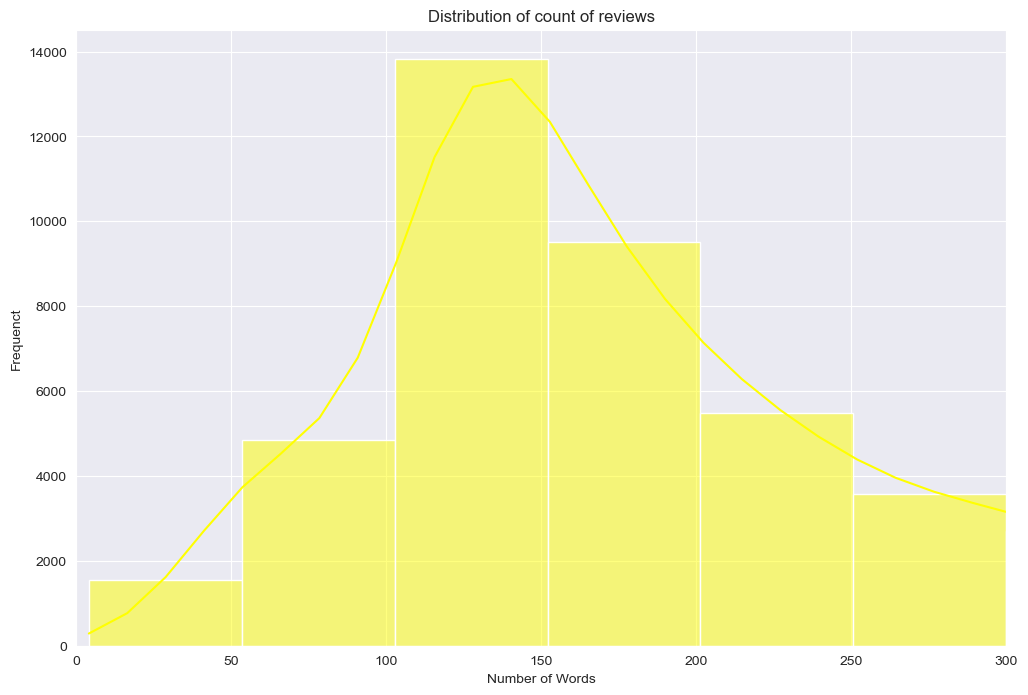

In [9]:
plt.figure(figsize=(12,8))
count_of_reviews=combined_data['review'].apply(lambda x: len(x.split()))
sns.histplot(count_of_reviews,bins=50,kde=True,color='yellow')
plt.title('Distribution of count of reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequenct')
plt.xlim(0, 300)
plt.show()


In [10]:
count_of_reviews.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

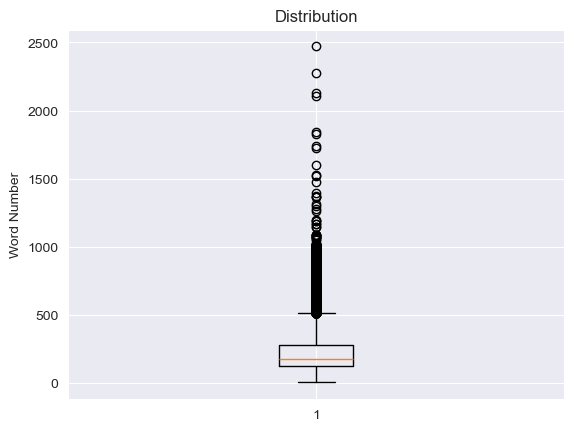

In [11]:
plt.boxplot(count_of_reviews)
plt.grid(True)
plt.title("Distribution")
plt.ylabel("Word Number")
plt.show()

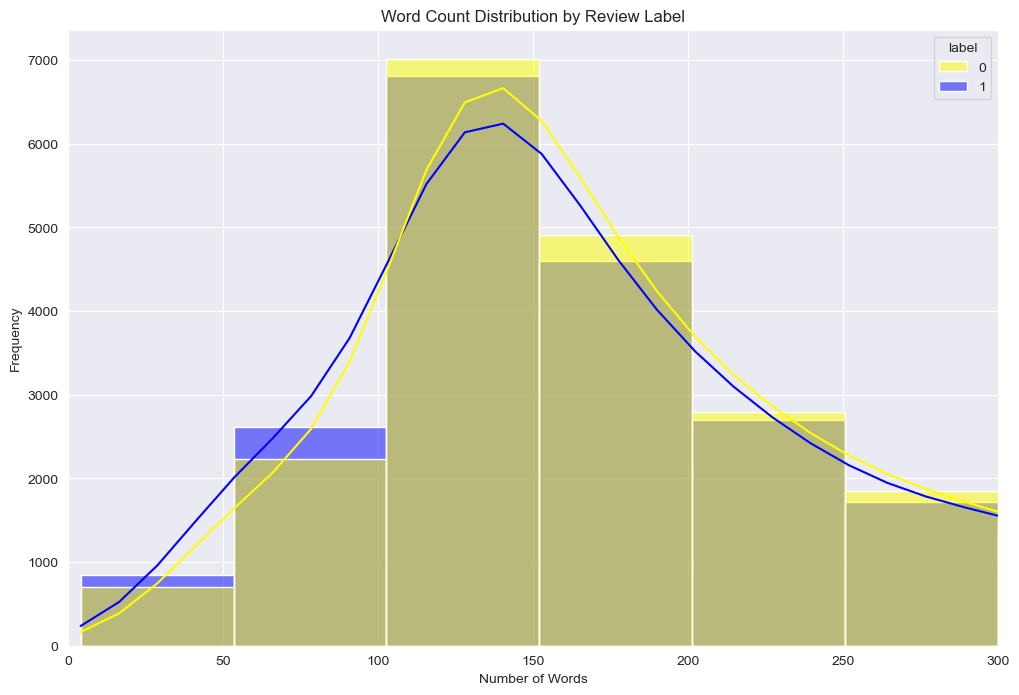

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(data=combined_data, x=count_of_reviews, bins=50, kde=True, hue='label', palette=['yellow', 'blue'])
plt.title("Word Count Distribution by Review Label")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.xlim(0,300)
plt.show()


In [14]:
copy_df=combined_data.copy()

In [159]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

In [160]:
train_data.shape

(40000, 2)

In [161]:
test_data.shape

(10000, 2)

In [162]:
train_data.head()

,review,label
39087,"Ah, here it is! A movie, which is said by peop...",0
30893,I saw this movie on PBS the first time. Then I...,1
45278,"At the beginning of 'Loggerheads', we're intro...",0
16398,"For the life of me, I cannot get why they woul...",0
13653,I always wrote this series off as being a comp...,0


In [165]:
positive_reviews_train=train_data[train_data["label"] == 1]["review"].tolist()
negative_reviews_train=train_data[train_data["label"] == 0]["review"].tolist()

In [15]:
def n_gram(input,n):
    input=input.split()
    output=[]
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    return output
    

In [118]:
def n_gram_with_punctuation(input,n):
    input=input.split()
    output=[]
    for word in input:
        if word[-1] in ".,!?;:<>/":
        #if word[-1] in ".,!?;:":
            output.append(word[:-1]) 
            output.append(word[-1])
        else:
            output.append(word)
    output = list(map(str, output))
    ngrams=[' '.join(output[i:i+n]) for i in range(len(output) - n + 1)]
    return ngrams

    

In [84]:
sample_text="Lorem ipsum dolor sit amet, consectetur adipiscing elit."
print(n_gram_with_punctuation(sample_text,2))


['Lorem ipsum', 'ipsum dolor', 'dolor sit', 'sit amet', 'amet ,', ', consectetur', 'consectetur adipiscing', 'adipiscing elit', 'elit .']


In [18]:
print(n_gram(sample_text,2))

[['Lorem', 'ipsum'], ['ipsum', 'dolor'], ['dolor', 'sit'], ['sit', 'amet,'], ['amet,', 'consectetur'], ['consectetur', 'adipiscing'], ['adipiscing', 'elit.']]


In [137]:
stop_word_list=["the","is","in","and","a","an","of","to","for","with","on","at","by","that","this","it","are","was"]
def stop_word_remove(input):
    input=input.split()
    output=[word for word in input if word.lower() not in stop_word_list]
    #return output
    return ' '.join(output)

In [20]:
sample_text_2="Take me down to the paradise city where the grass is green and the girls are pretty."
print(stop_word_remove(sample_text_2))

['Take', 'me', 'down', 'paradise', 'city', 'where', 'grass', 'green', 'girls', 'pretty.']


In [138]:
def create_bow(data,n,is_use_punctuation):
    bow_dict={}
    for text in data:
        text=stop_word_remove(text)
        if is_use_punctuation:
            ngram=n_gram_with_punctuation(text,n)
        else:
            ngram=n_gram(text,n)
        for n_item in ngram:
            if isinstance(n_item,list):
                ngram_str = ' '.join(n_item)
            else:
                ngram_str = n_item
            bow_dict[ngram_str] = bow_dict.get(ngram_str, 0) + 1           
    return bow_dict

In [263]:
sample=[  ##gpt text
    "The quick brown fox jumps over the lazy dog.",
    "This is a test sentence for the bag of words model.",
    "An example of creating bigrams in a sentence.",
    "The bag of words approach is useful in NLP."
]
sample_result=create_bow(sample,1,True)
print("Bow result of sample:")
for ngram, freq in sample_result.items():
    print(f"'{ngram}': {freq}")

Bow result of sample:
'quick': 1
'brown': 1
'fox': 1
'jumps': 1
'over': 1
'lazy': 1
'dog': 1
'.': 4
'test': 1
'sentence': 2
'bag': 2
'words': 2
'model': 1
'example': 1
'creating': 1
'bigrams': 1
'approach': 1
'useful': 1
'NLP': 1


In [149]:
review_list=combined_data["review"].tolist()

In [154]:
import math
def logaritmic_probabilities(bow_dict,word_count,size,laplace):
    dict={}
    for term, count in bow_dict.items():
        smoothened_version=(count+laplace)/(word_count+(size*laplace))
        dict[term]=math.log(smoothened_version)
    unknown_probability=math.log(laplace/(word_count+(size*laplace)))
    return dict,unknown_probability

In [197]:
def naive_bayes(review,positive_logaritmic_probability,negative_logaritmic_probability,positive_unknown_probability,negative_unknown_probability,positive_prior,negative_prior):
    words=review.split()
    positive_score=math.log(positive_prior)
    negative_score=math.log(negative_prior)
    for word in words:
        positive_score+=positive_logaritmic_probability.get(word,positive_unknown_probability)
        negative_score+=negative_logaritmic_probability.get(word,negative_unknown_probability)
    if positive_score>negative_score:
        return 1
    else:
        return 0

In [271]:
def calculate_accuracy(test_data,actual_labels):
    correct_predictions = 0
    for text, true_label in zip(test_data, actual_labels):
        prediction=naive_bayes(text,positive_logaritmic_probability,negative_logaritmic_probability,positive_unknown_probability,negative_unknown_probability,positive_prior,negative_prior)
        #print(prediction)
        #print(true_label)
        #print("----")
        if prediction == true_label:
            correct_predictions+=1
    accuracy=correct_predictions / len(test_data)
    return accuracy

In [272]:
def calculate_precision(test_data, actual_labels):
    TP = 0
    FP = 0
    for text, true_label in zip(test_data, actual_labels):
        prediction = naive_bayes(text, positive_logaritmic_probability, negative_logaritmic_probability, positive_unknown_probability, negative_unknown_probability, positive_prior, negative_prior)
        if prediction == 1 and true_label == 1:
            TP += 1
        elif prediction == 1 and true_label == 0:
            FP += 1
    if TP+FP>0:
        precision=TP/(TP+FP)
    else:
        precision=0
    return precision




In [273]:
def calculate_recall(test_data, actual_labels):
    TP = 0
    FN = 0
    for text, true_label in zip(test_data,actual_labels):
        prediction=naive_bayes(text, positive_logaritmic_probability, negative_logaritmic_probability, positive_unknown_probability, negative_unknown_probability, positive_prior, negative_prior)  
        if prediction == 1 and true_label == 1:
            TP+=1
        elif prediction == 0 and true_label == 1:
            FN+=1
    if TP+FN>0:
        recall=TP/(TP+FN)
    else:
        recall=0
    return recall


In [269]:
test_texts = test_data["review"].tolist()
true_labels = test_data["label"].tolist()


In [ ]:
positive_prior=len(positive_reviews_train)/(len(positive_reviews_train)+len(negative_reviews_train))
negative_prior=len(negative_reviews_train)/(len(positive_reviews_train)+len(negative_reviews_train))

In [265]:
## Classification Results with Unigram and Punctuation
print("Classification Results with Unigram and Punctuation are Below:")

Classification Results with Unigram and Punctuation are Below:


In [284]:
bow_positive_unigram_with_punctuation=create_bow(positive_reviews_train, 1, True)
bow_negative_unigram_with_punctuation=create_bow(negative_reviews_train, 1, True)

In [285]:
size=len(set(bow_positive_unigram_with_punctuation.keys()).union(bow_negative_unigram_with_punctuation.keys())) 


In [286]:
total_positive_words=sum(bow_positive_unigram_with_punctuation.values())
total_negative_words=sum(bow_negative_unigram_with_punctuation.values())

In [287]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_unigram_with_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_unigram_with_punctuation, total_negative_words, size, 1)


In [288]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7034


In [289]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.9583150504607284


In [290]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 0.4320474777448071


In [291]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.5955822197982003


In [281]:
print("--------------------------------------------------")

--------------------------------------------------


In [280]:
##Classification Result with Unigram and No Punctuation
print("Classification Result with Unigram and No Punctuation are Below:")

Classification Result with Unigram and No Punctuation are Below:


In [294]:
bow_positive_unigram_without_punctuation=create_bow(positive_reviews_train, 1, False)
bow_negative_unigram_without_punctuation=create_bow(negative_reviews_train, 1, False)

In [295]:
size=len(set(bow_positive_unigram_without_punctuation.keys()).union(bow_negative_unigram_without_punctuation.keys()))
total_positive_words=sum(bow_positive_unigram_without_punctuation.values())
total_negative_words=sum(bow_negative_unigram_without_punctuation.values())

In [296]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_unigram_without_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_unigram_without_punctuation, total_negative_words, size, 1)


In [297]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.858


In [298]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.882229232386961


In [299]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 0.8298714144411474


In [300]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.8552497451580021


In [301]:
print("--------------------------------------------------")

--------------------------------------------------


In [302]:
##Classification Result with Bigram and  Punctuation
print("Classification Result with Bigram and Punctuation are Below:")

Classification Result with Bigram and Punctuation are Below:


In [303]:
bow_positive_bigram_with_punctuation=create_bow(positive_reviews_train, 2, True)
bow_negative_bigram_with_punctuation=create_bow(negative_reviews_train, 2, True)

In [304]:
size=len(set(bow_positive_bigram_with_punctuation.keys()).union(bow_negative_bigram_with_punctuation.keys()))
total_positive_words=sum(bow_positive_bigram_with_punctuation.values())
total_negative_words=sum(bow_negative_bigram_with_punctuation.values())

In [305]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_bigram_with_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_bigram_with_punctuation, total_negative_words, size, 1)

In [306]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5057


In [307]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.5056022408963585


In [308]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 0.9998021760633037


In [309]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.6715832835027573


In [310]:
print("--------------------------------------------------")

--------------------------------------------------


In [311]:
##Classification Result with Bigram and No Punctuation
print("Classification Result with Bigram and No Punctuation are Below:")

Classification Result with Bigram and No Punctuation are Below:


In [336]:
bow_positive_bigram_without_punctuation=create_bow(positive_reviews_train, 2, False)
bow_negative_bigram_without_punctuation=create_bow(negative_reviews_train, 2, False)

In [337]:
size=len(set(bow_positive_bigram_without_punctuation.keys()).union(bow_negative_bigram_without_punctuation.keys()))
total_positive_words=sum(bow_positive_bigram_without_punctuation.values())
total_negative_words=sum(bow_negative_bigram_without_punctuation.values())

In [338]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_bigram_without_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_bigram_without_punctuation, total_negative_words, size, 1)

In [339]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5057


In [340]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.5056011202240448


In [341]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 1.0


In [342]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.6716269182222813


In [325]:
print("--------------------------------------------------")

--------------------------------------------------


In [334]:
##Classification Result with Trigram and No Punctuation
print("Classification Result with Trigram and No Punctuation are Below:")

Classification Result with Trigram and No Punctuation are Below:


In [326]:
bow_positive_trigram_without_punctuation=create_bow(positive_reviews_train, 3, False)
bow_negative_trigram_without_punctuation=create_bow(negative_reviews_train, 3, False)

In [327]:
size=len(set(bow_positive_trigram_without_punctuation.keys()).union(bow_negative_trigram_without_punctuation.keys()))
total_positive_words=sum(bow_positive_trigram_without_punctuation.values())
total_negative_words=sum(bow_negative_trigram_without_punctuation.values())

In [328]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_trigram_without_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_trigram_without_punctuation, total_negative_words, size, 1)

In [329]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5056


In [330]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 0.9998021760633037


In [331]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.5055516654996499


In [332]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.6715386659580123


In [333]:
print("--------------------------------------------------")

--------------------------------------------------


In [335]:
##Classification Result with Trigram and Punctuation
print("Classification Result with Trigram and Punctuation are Below:")

Classification Result with Trigram and Punctuation are Below:


In [343]:
bow_positive_trigram_with_punctuation=create_bow(positive_reviews_train, 3, True)
bow_negative_trigram_with_punctuation=create_bow(negative_reviews_train, 3, True)

In [344]:
size=len(set(bow_positive_trigram_with_punctuation.keys()).union(bow_negative_trigram_with_punctuation.keys()))
total_positive_words=sum(bow_positive_trigram_with_punctuation.values())
total_negative_words=sum(bow_negative_trigram_with_punctuation.values())

In [345]:
positive_logaritmic_probability, positive_unknown_probability=logaritmic_probabilities(bow_positive_trigram_with_punctuation, total_positive_words, size, 1)
negative_logaritmic_probability, negative_unknown_probability=logaritmic_probabilities(bow_negative_trigram_with_punctuation, total_negative_words, size, 1)

In [346]:
accuracy=calculate_accuracy(test_texts,true_labels)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5055


In [347]:
recall=calculate_recall(test_texts, true_labels)
print(f"Model Recall: {recall}")

Model Recall: 0.9992087042532146


In [348]:
precision=calculate_precision(test_texts, true_labels)
print(f"Model Precision: {precision}")

Model Precision: 0.5055044035228182


In [349]:
f1=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {f1}")

F1 Score: 0.6713630624044661


In [350]:
print("--------------------------------------------------")

--------------------------------------------------


In [352]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names=['Ngram Type', 'Is Punctuation Used', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
x.add_row(['Unigram', 'True', '0.7034','0.9583150504607284', '0.4320474777448071','0.5955822197982003'])
x.add_row(['Unigram', 'False', '0.858','0.882229232386961','0.8298714144411474','0.8552497451580021'])
x.add_row(['Bigram', 'True', '0.5057','0.5056022408963585','0.9998021760633037','0.6715832835027573'])
x.add_row(['Bigram', 'False', '0.5057','0.5056011202240448','1.0','0.6716269182222813'])
x.add_row(['Trigram', 'True', '0.5055','0.5055044035228182','0.9992087042532146','0.6713630624044661'])
x.add_row(['Trigram', 'False', '0.5056','0.5055516654996499','0.9998021760633037','0.6715386659580123'])
print(x)

+------------+---------------------+----------+--------------------+--------------------+--------------------+
| Ngram Type | Is Punctuation Used | Accuracy |     Precision      |       Recall       |      F1 Score      |
+------------+---------------------+----------+--------------------+--------------------+--------------------+
|  Unigram   |         True        |  0.7034  | 0.9583150504607284 | 0.4320474777448071 | 0.5955822197982003 |
|  Unigram   |        False        |  0.858   | 0.882229232386961  | 0.8298714144411474 | 0.8552497451580021 |
|   Bigram   |         True        |  0.5057  | 0.5056022408963585 | 0.9998021760633037 | 0.6715832835027573 |
|   Bigram   |        False        |  0.5057  | 0.5056011202240448 |        1.0         | 0.6716269182222813 |
|  Trigram   |         True        |  0.5055  | 0.5055044035228182 | 0.9992087042532146 | 0.6713630624044661 |
|  Trigram   |        False        |  0.5056  | 0.5055516654996499 | 0.9998021760633037 | 0.6715386659580123 |
+

In [353]:
##REPORT
print("Report of the project is below:")

Report of the project is below:


In this assignment, I tried to solve a classification problem using NLP. Naive Bayes Algorithm is used for classification, n-gram models is used for Bow.

First I imported the data and made some visualizations and summaries to understand data better. Then I splitted my data as train and test data with 0.8 train ratio and 0.2 test ratio. Then I implemented Ngram algorithms. I have 2 ngram methods, one is considering punctuation marks as word, the other is not. Then I impleneted a method to remove stop words. I created an array for stop/unnecessary words and in the method, I removed the stop words from parameter text. Then, I implemented create_bow method to create my dictionaries. In this method, first I removed all stopwords from review. Then I used one of the ngram methods according to the parameters that shows punctuation is used and n number for ngrams. Then I implemented logarithmic probabilities calculation method and naive bayes classification method. In naive bayes, unknown probabilities are used too. Finally, I implemented accuracy precision and recall calculation methods to evaluate my models performance.

After the implementation parts, I started to testing part. I used 6 test cases as "Unigram With Punctuation, Unigram With No Punctuation, Bigram With Punctuation, Bigram With No Punctuation, Trigram With Punctuation, Trigram With No Punctuation". I created bow dict and calculated vocab size, positive/negative logaritmic probabilities and positive/negative unknown probabilities for each cases. Then I evaluated their performances.

Unigram With No Punctuation gets highest accuracy and F1 score. Unigram With Punctuation has the second best accuracy, but the lowest F1 score. Bigram and Trigram results are very close to each other, approximately the same values. Their accuracies are lower than Unigram accuracies, but they have better recall values. According to the results, Unigram is the best ngram type for that project, especially when punctuations are not considered as words. For bigram and trigram, punctuation made very small changes. So I could say that one word focused dictionary is better.

To get higher accuracies; more unnecessary words may be added to stop word array, text may be preprocessed, TFIDF may be used instead of Bow for extracting, some other models especially neural network based models may be used instead of Naive Bayes.